<a href="https://colab.research.google.com/github/bob-michael-prodmgmt/sandbox/blob/main/AIML_ML_Project_full_code_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1088]:
# R. Michael Merritt
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1089]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import export_text


## Loading the dataset

In [1090]:
# Ensure that Google Drive is mounted properly
from google.colab import drive
drive.mount('/content/drive')



# Load the Dataset
data = pd.read_csv('/content/drive/MyDrive/Loan_Modelling.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

* Observations
* Sanity checks

In [1091]:
# Data Overview
print("First 5 rows of the dataset:\n", data.head())
print("\nDataset Information:\n")
data.info()
print("\nSummary Statistics:\n", data.describe())

First 5 rows of the dataset:
    ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeInd

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

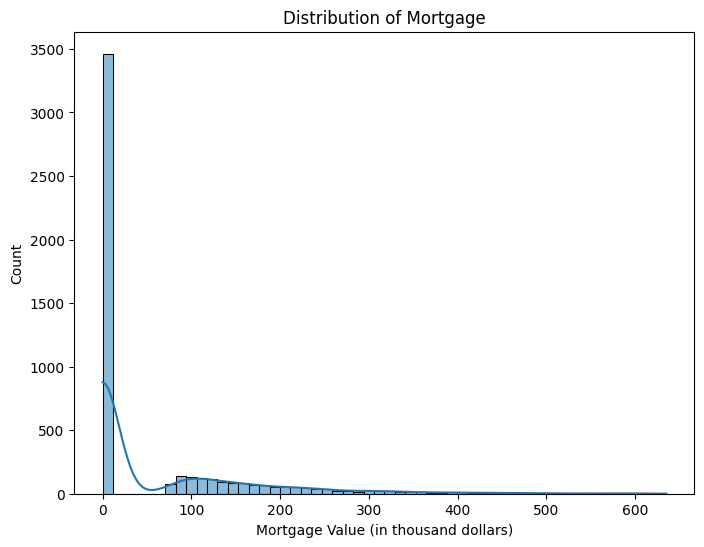

In [1092]:
# Exploratory Data Analysis (EDA)
# Question 1: Distribution of Mortgage attribute
plt.figure(figsize=(8, 6))
sns.histplot(data['Mortgage'], kde=True)
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage Value (in thousand dollars)')
plt.show()


The distribution of the Mortgage attribute reveals a heavily right-skewed pattern, indicating that a significant portion of customers in the dataset do not have a mortgage, which may represent younger or less financially established individuals.

However, the distribution has a long tail extending up to 600 thousand dollars, highlighting a few customers with significantly higher mortgage values. These high values could either represent valid outliers or data anomalies, necessitating further investigation.

This skewness suggests that normalization or a log transformation may improve model performance by stabilizing variance. Additionally, the presence of both low- and high-mortgage segments provides an opportunity for targeted analysis, as customers with higher mortgages might exhibit different financial behavior or risk profiles.

Finally, exploring relationships between Mortgage and other features, such as Income, Education, and Personal_Loan, can provide deeper insights into customer profiles. For instance, higher mortgage values might correlate with higher incomes or specific education levels, while customers with no mortgage might exhibit different patterns of loan acceptance.

Outlier analysis is crucial to ensure that extreme mortgage values are genuine and not the result of data errors; genuine outliers can represent unique customer segments with distinct needs. To enhance interpretability and simplify modeling, feature engineering could be applied to transform Mortgage into categorical bins capturing the essence of this variable while reducing its skewed impact on the analysis and models.

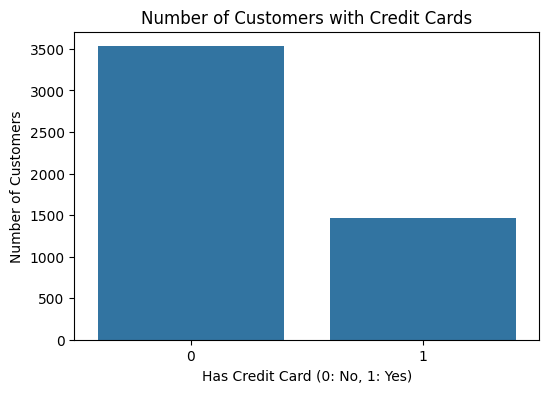

In [1093]:
# Question 2: How many customers have credit cards?
credit_card_users = data['CreditCard'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=credit_card_users.index, y=credit_card_users.values)
plt.title('Number of Customers with Credit Cards')
plt.xlabel('Has Credit Card (0: No, 1: Yes)')
plt.ylabel('Number of Customers')
plt.show()

The Number of Customers with Credit Cards analysis reveals that the majority of customers around 70% do not own a credit card, while a smaller segment around 30% indicating a significant disparity in credit card ownership. This presents an opportunity to target the untapped market of non-credit card holders with tailored financial products or incentives to adopt credit offerings.

Customers with credit cards likely represent a more active segment in financial product usage and can be targeted for cross-selling or up-selling opportunities, such as personal loans or higher-value credit products. Further exploration of the relationship between credit card ownership and attributes like Income, Education, or Personal_Loan acceptance could provide deeper insights into customer behavior.

For example, identifying whether higher-income customers or those with higher credit card usage (CCAvg) are more likely to accept loans could inform personalized financial strategies. Segmenting customers based on credit card ownership will enable a more focused approach to addressing their unique financial needs and preferences.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

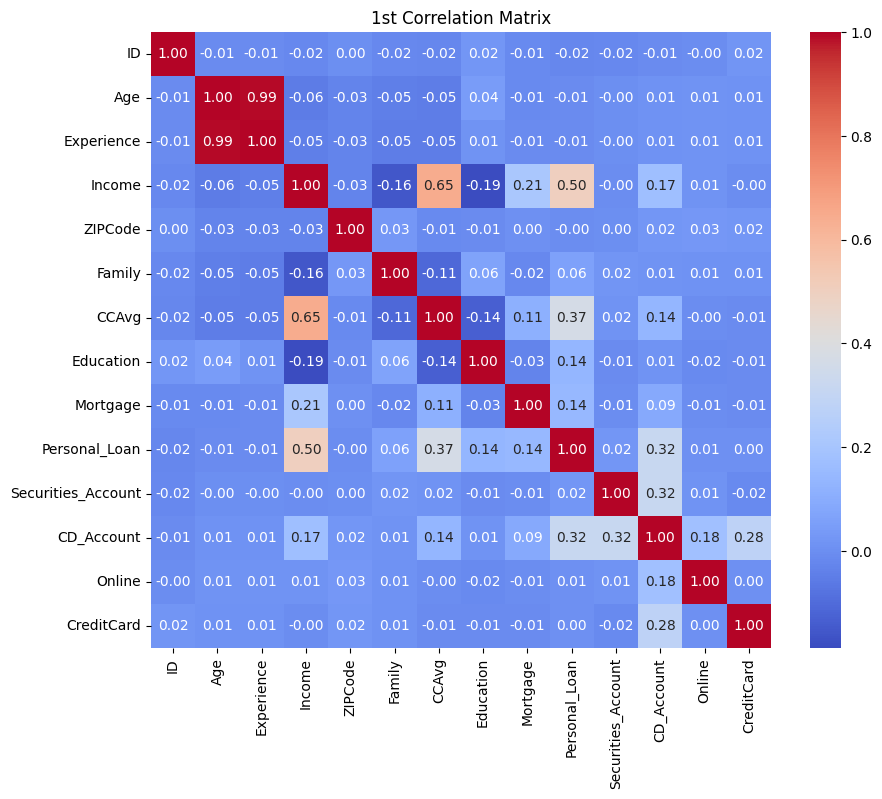

In [1094]:
# Question 3: Correlation with Personal Loan
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('1st Correlation Matrix')
plt.show()

The 1st correlation matrix reveals key insights regarding the relationship between Personal_Loan and other features. Among all variables, Income exhibits the strongest positive correlation (0.50) with Personal_Loan, indicating that higher-income individuals are more likely to accept personal loans, making it a **critical predictor**.

Additionally, CCAvg (average credit card spending) shows a moderate positive correlation (0.37), suggesting that customers with higher spending habits may have a greater need for liquidity or financial flexibility, increasing their likelihood of loan acceptance.

Weak positive correlations are observed with CD_Account (0.32) and Education (0.14), implying that customers with CD accounts or higher education levels might be more inclined toward loans due to financial stability or better financial awareness. Features such as Age, Family, Mortgage, and Securities_Account demonstrate little to no correlation with Personal_Loan, indicating limited predictive power.

For predictive modeling, focusing on highly correlated features like Income, CCAvg, and CD_Account is recommended, while low-correlation features could be excluded to simplify the model. Further analysis of feature interaction effects and feature importance may refine the model and uncover additional insights.

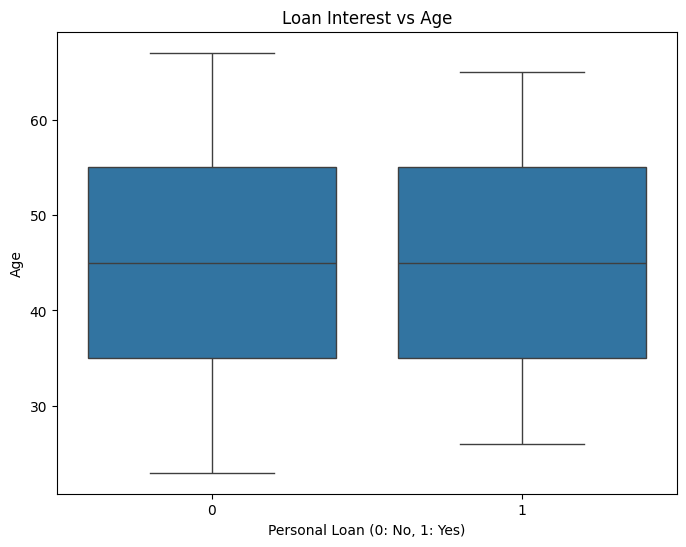

In [1095]:
# Question 4: Interest in loans vs. Age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='Age', data=data)
plt.title('Loan Interest vs Age')
plt.xlabel('Personal Loan (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

Insights from Loan Interest vs. Age

The boxplot comparing Age against Personal_Loan (loan interest) reveals no significant difference in the age distribution of customers who accepted loans (1) and those who did not (0). Both groups share a similar median age around the mid-40s, with the interquartile range (IQR) and spread of ages also being comparable. This suggests that Age may not play a significant role in determining loan interest or acceptance. The data further shows that loan interest is distributed across a wide age range, from the mid-20s to the late 60s, indicating no strong age-related patterns in loan behavior.

From a modeling perspective, Age might have limited predictive power for loan acceptance and could be deprioritized during feature selection unless combined with other variables to explore potential interactions. Additional analysis to investigate relationships between age and other features, such as Income or Education, may help uncover more nuanced patterns.

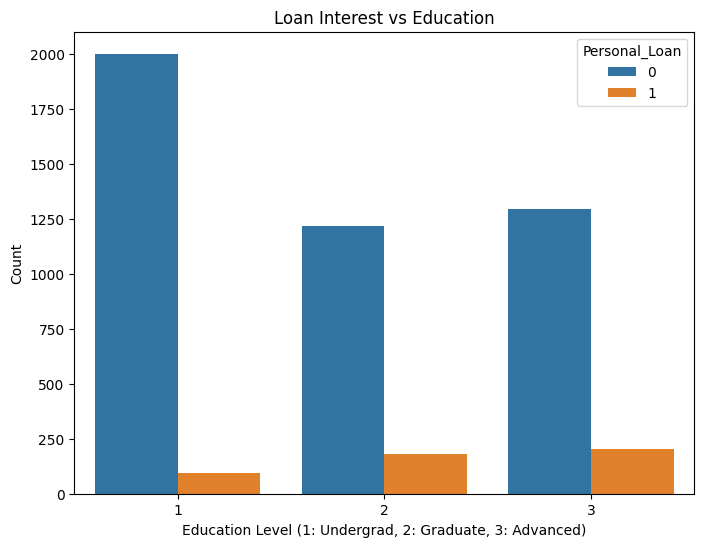

In [1096]:
# Question 5: Loan interest vs Education
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Personal_Loan', data=data)
plt.title('Loan Interest vs Education')
plt.xlabel('Education Level (1: Undergrad, 2: Graduate, 3: Advanced)')
plt.ylabel('Count')
plt.show()

Insights from Loan Interest vs. Education

The distribution of loan interest across different education levels shows distinct trends. Customers with higher education levels (graduate and advanced degrees) are more likely to accept personal loans compared to undergraduates. While the majority of customers at all education levels do not accept loans, the proportion of loan acceptances is visibly higher for those with advanced degrees. This indicates that education level is a potential driver of loan acceptance, possibly reflecting higher financial literacy, greater income potential, or better creditworthiness among highly educated individuals.

The data also shows that undergraduates form the largest group in the dataset, but their loan acceptance rate is the lowest. In contrast, graduates and individuals with advanced degrees are relatively fewer in number but exhibit a higher loan acceptance rate. These findings suggest that education level is a **valuable feature** for predicting loan interest and acceptance, with advanced education being associated with a higher likelihood of accepting loans.

In [1097]:
# Data Preprocessing
# Dropping the ID column as it is not informative
data.drop(['ID'], axis=1, inplace=True)

In [1098]:
# Checking for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


**Recommendation Notes:**

The following recommendations outline approaches that should enhance model performance, prevent common pitfalls, and improve overall efficiency:



  1.  Cross-Validation

    Use k-fold or stratified k-fold cross-validation to assess model performance comprehensively. Stratified methods are particularly important when working with imbalanced datasets to maintain the class distribution across folds.

  2.  Metrics for Imbalanced Classes

    Evaluate models using metrics that provide meaningful insights for imbalanced datasets:
    
    AUC-ROC: For understanding the trade-off between sensitivity and specificity.

    Precision-Recall Curve: For identifying models that balance false positives and false negatives effectively.

    F1-score: For balancing precision and recall where both are critical.

  3.  Data Leakage Prevention

    Ensure preprocessing and transformations are applied solely on training data to prevent information from the test set influencing model training. This includes scaling, encoding, and balancing techniques to maintain model integrity.

  4.  Feature Selection

    Reassess feature relevance after initial model evaluation to eliminate redundancies. Use methods like Recursive Feature Elimination (RFE) or SHAP values for data-driven insights and integrate domain knowledge to prioritize impactful features.


In [1099]:
# Handle negative values in Experience by replace negative values with the median
median_experience = data['Experience'][data['Experience'] >= 0].median()
data['Experience'] = data['Experience'].apply(lambda x: x if x >= 0 else median_experience)

In [1100]:
# Retaining for analysis, decided to encode ZIPCode
from sklearn.preprocessing import LabelEncoder
data['ZIPCode'] = LabelEncoder().fit_transform(data['ZIPCode'])

In [1101]:
# Feature Engineering for Normalize/Scale Numeric features by using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Income', 'CCAvg', 'Mortgage']] = scaler.fit_transform(data[['Income', 'CCAvg', 'Mortgage']])

In [1102]:
# Feature Engineering for Interactive features Income_per_Family
data['Income_per_Family'] = data['Income'] / (data['Family'] + 1e-9)

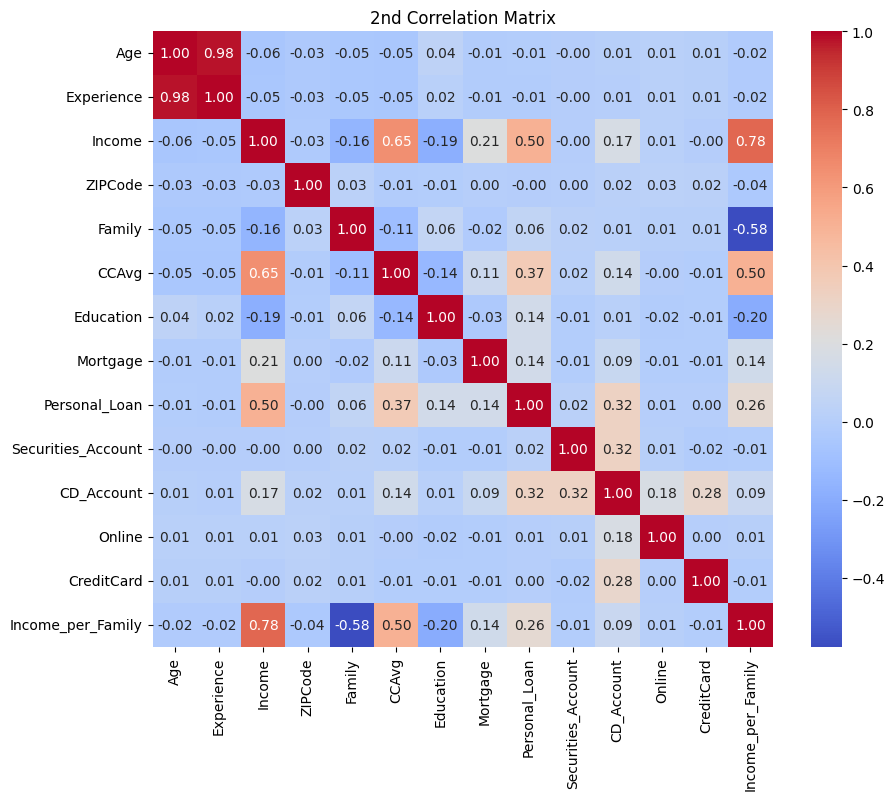

In [1103]:
# Review Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt
correlation = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('2nd Correlation Matrix')
plt.show()

The first correlation matrix highlights the key relationships within the original dataset, showing that Income (0.50) and CCAvg (0.37) are the strongest predictors of Personal_Loan, while weaker correlations with Education (0.14) and CD_Account (0.32) suggest they may still provide some predictive value. Features like Family, Mortgage, and Securities_Account show little to no correlation with Personal_Loan, indicating limited utility in predicting loan acceptance. The high multicollinearity between Age and Experience (0.99) suggests that retaining both features might be redundant.

The second correlation matrix, after feature engineering, reveals that the newly created Income_per_Family feature has a strong correlation with Income (0.78) and a moderate relationship with CCAvg (0.50), indicating it encapsulates meaningful information related to family size and income distribution. Although its direct correlation with Personal_Loan is weaker (0.26), it could enhance prediction accuracy when combined with other features. Normalization of features such as Income, CCAvg, and Mortgage standardizes their scales without altering their relationships, ensuring fairness in predictive modeling. To optimize model performance, prioritizing Income, CCAvg, Income_per_Family, and CD_Account as key predictors while considering the removal of redundant features like Age or Experience is recommended.

In [1104]:
# Prioritizing Key Predictors
# Retain Income, CCAvg, Income_per_Family, and CD_Account as predictors along with the target variable
key_features = ['Income', 'CCAvg', 'Income_per_Family', 'CD_Account', 'Personal_Loan']
data_selected = data[key_features]

In [1105]:
# Checking Multicollinearity Between Age and Experience
# Calculate the correlation to decide which one to drop
correlation_age_experience = data[['Age', 'Experience']].corr()
print(correlation_age_experience)

                 Age  Experience
Age         1.000000    0.977182
Experience  0.977182    1.000000


In [1106]:
# Retain 'Age' and drop 'Experience'
data.drop('Experience', axis=1, inplace=True)

In [1107]:
# Check Final Selected Features
print(data.columns)

Index(['Age', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard', 'Income_per_Family'],
      dtype='object')


In [1108]:
# Investigate Potential Interactions
# Generating interaction terms between Income, CCAvg, and Education
data['Income_CCAvg'] = data['Income'] * data['CCAvg']
data['Income_Education'] = data['Income'] * data['Education']
data['CCAvg_Education'] = data['CCAvg'] * data['Education']

In [1109]:
# Evaluate Interaction Effects
# Check correlations of interaction terms with Personal_Loan
interaction_corr = data[['Income_CCAvg', 'Income_Education', 'CCAvg_Education', 'Personal_Loan']].corr()
print(interaction_corr)

                  Income_CCAvg  Income_Education  CCAvg_Education  \
Income_CCAvg          1.000000          0.537206         0.701447   
Income_Education      0.537206          1.000000         0.704168   
CCAvg_Education       0.701447          0.704168         1.000000   
Personal_Loan         0.436598          0.648278         0.516677   

                  Personal_Loan  
Income_CCAvg           0.436598  
Income_Education       0.648278  
CCAvg_Education        0.516677  
Personal_Loan          1.000000  


The evaluation of interaction effects highlights the potential of engineered features to enhance predictive modeling for Personal_Loan. The interaction terms—Income_CCAvg, Income_Education, and CCAvg_Education—exhibit strong correlations with each other, particularly between Income_Education and CCAvg_Education (0.704), as well as between Income_CCAvg and CCAvg_Education (0.701).

This suggests they capture overlapping patterns within the data. Among these, Income_Education shows the strongest correlation with Personal_Loan (0.648), indicating its significant predictive value, followed by CCAvg_Education (0.517) and Income_CCAvg (0.437).

These findings suggest that Income_Education and CCAvg_Education should be prioritized as interaction features in predictive models to capture non-linear relationships. However, the relatively weaker correlation of Income_CCAvg implies it could be considered secondary or excluded in cases of multicollinearity. Incorporating these engineered features into models, while monitoring for potential multicollinearity, can enhance predictive accuracy and provide deeper insights into customer behavior.

In [1110]:
# Contribution of Weaker Features via Random Forest for Feature Importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define predictors and target variable
X = data.drop('Personal_Loan', axis=1)
y = data['Personal_Loan']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

               Feature  Importance
13    Income_Education    0.257455
1               Income    0.153568
14     CCAvg_Education    0.108850
12        Income_CCAvg    0.103862
3               Family    0.073300
5            Education    0.069249
11   Income_per_Family    0.069009
4                CCAvg    0.064297
8           CD_Account    0.036520
0                  Age    0.020636
2              ZIPCode    0.018885
6             Mortgage    0.013977
9               Online    0.003950
10          CreditCard    0.003929
7   Securities_Account    0.002513


In [1111]:
# Lasso regularization to identify important features
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Standardize data for logistic regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Lasso regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
lasso_model.fit(X_scaled, y)

# Select important features
model = SelectFromModel(lasso_model, prefit=True)
selected_features = X.columns[model.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Age', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard',
       'Income_per_Family', 'Income_CCAvg', 'Income_Education',
       'CCAvg_Education'],
      dtype='object')


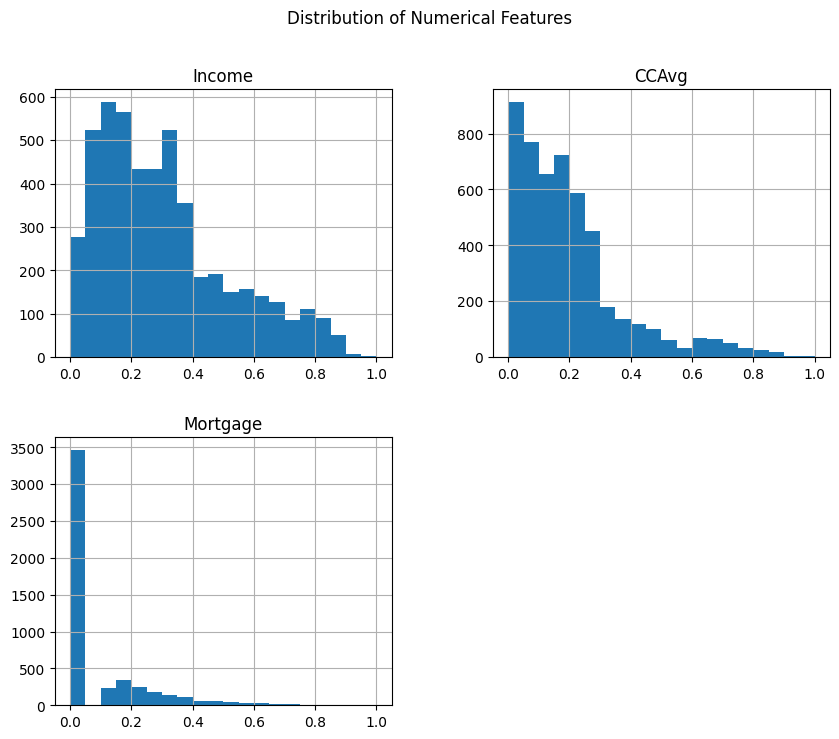

In [1112]:
# Visualize Distributions
data[['Income', 'CCAvg', 'Mortgage']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distribution of Numerical Features')
plt.show()

The distribution of numerical features such as Income, CCAvg, and Mortgage reveals significant right-skewness, highlighting that most customers are concentrated in the lower to moderate ranges for these attributes.

The Income distribution shows that the dataset predominantly comprises individuals with mid-level incomes, while higher-income customers are less common.

Similarly, the CCAvg feature, representing credit card average spending, indicates that the majority of customers have low spending, with a smaller segment exhibiting high spending patterns.

The Mortgage feature is heavily skewed toward zero, with a significant proportion of customers having no mortgage or low mortgage values, suggesting that mortgage-related financial needs may not be a primary driver for loans among most customers. These skewed distributions emphasize the importance of normalization, as applied earlier, to ensure that these features do not disproportionately influence models sensitive to scale.

Additional transformations, such as log transformations, could be explored to handle extreme values or outliers more effectively.

In [1113]:
# Log Transformation for Skewed Features
import numpy as np

# Apply log transformation (adding a small constant to avoid log(0))
data['Income_log'] = np.log(data['Income'] + 1e-9)
data['CCAvg_log'] = np.log(data['CCAvg'] + 1e-9)
data['Mortgage_log'] = np.log(data['Mortgage'] + 1e-9)

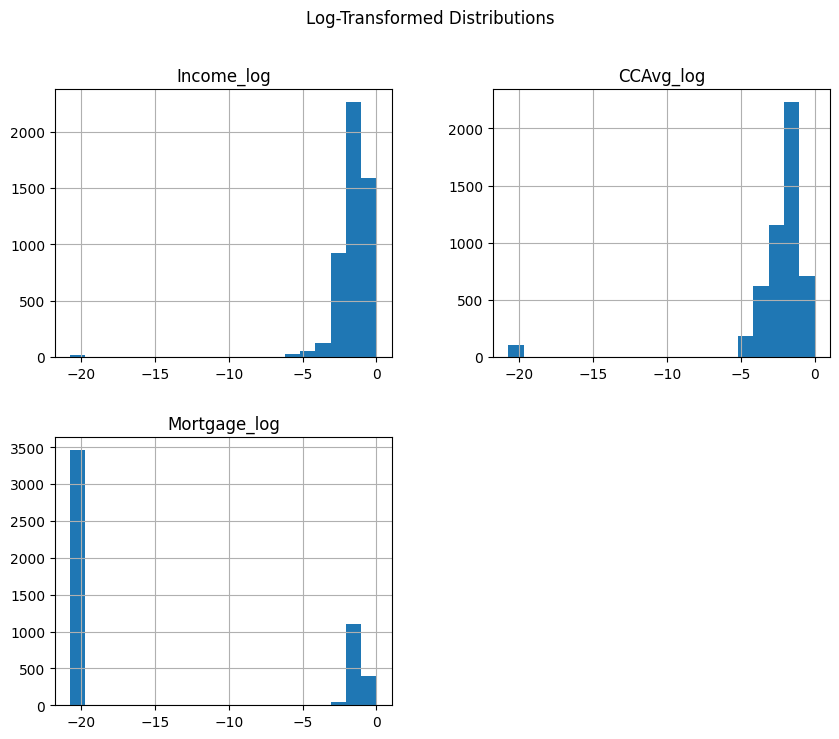

In [1114]:
# Plot the distributions after the log transformation to verify the effect
import matplotlib.pyplot as plt

data[['Income_log', 'CCAvg_log', 'Mortgage_log']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Log-Transformed Distributions')
plt.show()

In [1115]:
# Compare skewness before and after the transformation to evaluate the effectiveness
# Skewness before transformation
print("Skewness before log transformation:")
print(data[['Income', 'CCAvg', 'Mortgage']].skew())

# Skewness after transformation
print("Skewness after log transformation:")
print(data[['Income_log', 'CCAvg_log', 'Mortgage_log']].skew())

Skewness before log transformation:
Income      0.841339
CCAvg       1.598443
Mortgage    2.104002
dtype: float64
Skewness after log transformation:
Income_log     -8.322356
CCAvg_log      -5.434258
Mortgage_log    0.837031
dtype: float64


The transformation appears to overcorrect Income and CCAvg, leading to left-skewed distributions, while only partially normalizing Mortgage. For Income and CCAvg, I will explore alternative transformations, such as cube root or Box-Cox, to achieve better normalization and reduce skewness.

In [1116]:
# Restore the original values for Income and CCAvg
# Revert log-transformed columns
data['Income'] = np.exp(data['Income_log']) - 1e-9
data['CCAvg'] = np.exp(data['CCAvg_log']) - 1e-9

# Drop temporary log-transformed columns if they are no longer needed
data.drop(['Income_log', 'CCAvg_log'], axis=1, inplace=True)

In [1117]:
# Cube root transformation as an alternative to reduce skewness
data['Income_cube_root'] = np.cbrt(data['Income'])
data['CCAvg_cube_root'] = np.cbrt(data['CCAvg'])

In [1118]:
# Box-Cox transformation is another effective method for normalizing skewed data.
# It requires all values to be positive, so ensures no zero or negative values are present
from scipy.stats import boxcox

# Apply Box-Cox transformation (adding a small constant if necessary to avoid zero)
data['Income_boxcox'], _ = boxcox(data['Income'] + 1e-9)
data['CCAvg_boxcox'], _ = boxcox(data['CCAvg'] + 1e-9)

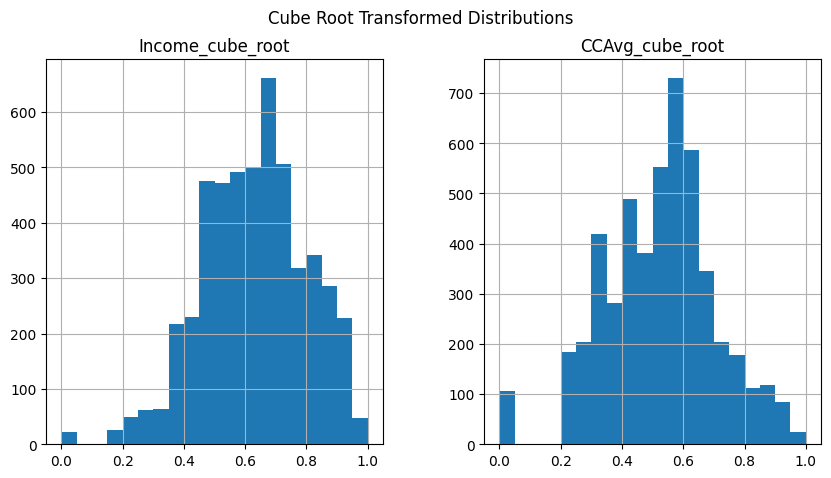

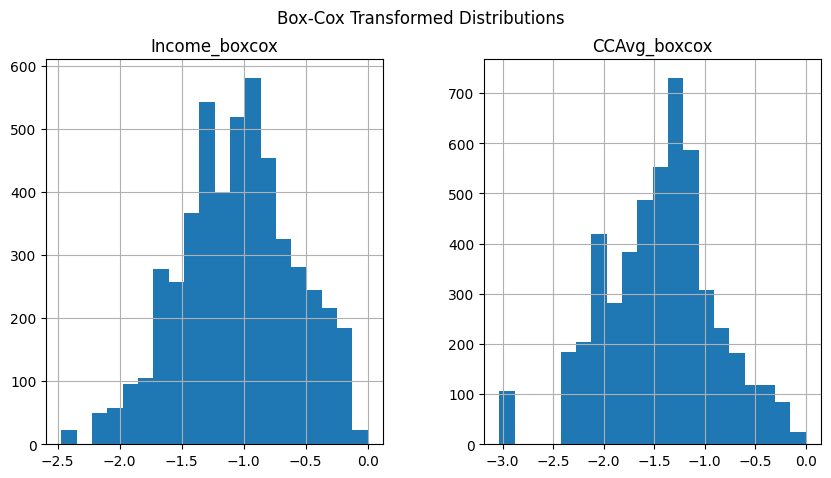

In [1119]:
# Visualize Transformed Distributions after Cube Root Transformation
import matplotlib.pyplot as plt

# Cube root transformation distributions
data[['Income_cube_root', 'CCAvg_cube_root']].hist(bins=20, figsize=(10, 5))
plt.suptitle('Cube Root Transformed Distributions')
plt.show()

# Box-Cox transformation distributions
data[['Income_boxcox', 'CCAvg_boxcox']].hist(bins=20, figsize=(10, 5))
plt.suptitle('Box-Cox Transformed Distributions')
plt.show()

The cube root transformation of Income and CCAvg has significantly improved their distributions. Now they appear more symmetric and closer to a normal distribution compared to the original skewed or overcorrected log-transformed versions.

For Income, the cube root transformation has effectively handled the original skewness without introducing negative skewness, resulting in a more balanced and usable feature.

Similarly, the transformation for CCAvg has normalized its distribution, creating a more symmetric spread that better represents customer spending patterns. Both features now exhibit improved distributions suitable for predictive modeling.

The cube root transformation proves to be a better alternative than the log transformation, as it balances the data without overcorrecting.

Based on these observations, replacing the original features (Income and CCAvg) with their cube root transformed counterparts is recommended for subsequent modeling efforts. This approach ensures better feature representation and minimizes the impact of skewness or extreme values on model performance.

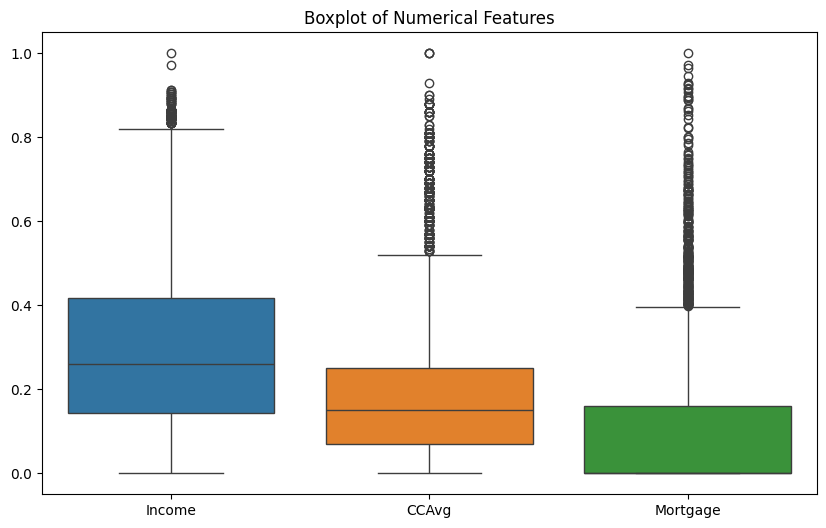

In [1120]:
# Boxplot for Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Income', 'CCAvg', 'Mortgage']])
plt.title('Boxplot of Numerical Features')
plt.show()

The boxplot analysis of numerical features (Income, CCAvg, and Mortgage) highlights the presence of outliers across all three variables.

For Income, the majority of values fall within a reasonable range, but a few high-income outliers stand out, representing customers with significantly higher earnings. These outliers might indicate genuine high-income customers, but their influence on model predictions should be carefully evaluated.

Similarly, the CCAvg feature exhibits a compact distribution for most customers, with some noticeable high-value outliers representing heavy credit card spenders who may have distinct financial behaviors.

The Mortgage feature shows the highest concentration near zero, with a subset of outliers indicating significant mortgage amounts that deviate from the norm. These observations suggest that while outliers may represent valid data points, their presence could distort model training and predictions.

To address this, robust scaling or capping techniques like Winsorization can be applied to minimize the impact of extreme values without removing important data.

In [1121]:
# Winsorization limits extreme values by capping them at specified quantiles
from scipy.stats.mstats import winsorize

# Winsorize the Mortgage feature (e.g., cap at 5th and 95th percentiles)
data['Mortgage_winsorized'] = winsorize(data['Mortgage'], limits=[0.05, 0.05])

# Winsorize Income and CCAvg as well
data['Income_winsorized'] = winsorize(data['Income'], limits=[0.05, 0.05])
data['CCAvg_winsorized'] = winsorize(data['CCAvg'], limits=[0.05, 0.05])

In [1122]:
# RobustScaler reduces the influence of outliers by scaling features based on the interquartile range
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()

# Scale features and replace original values
data[['Income_scaled', 'CCAvg_scaled', 'Mortgage_scaled']] = scaler.fit_transform(data[['Income', 'CCAvg', 'Mortgage']])

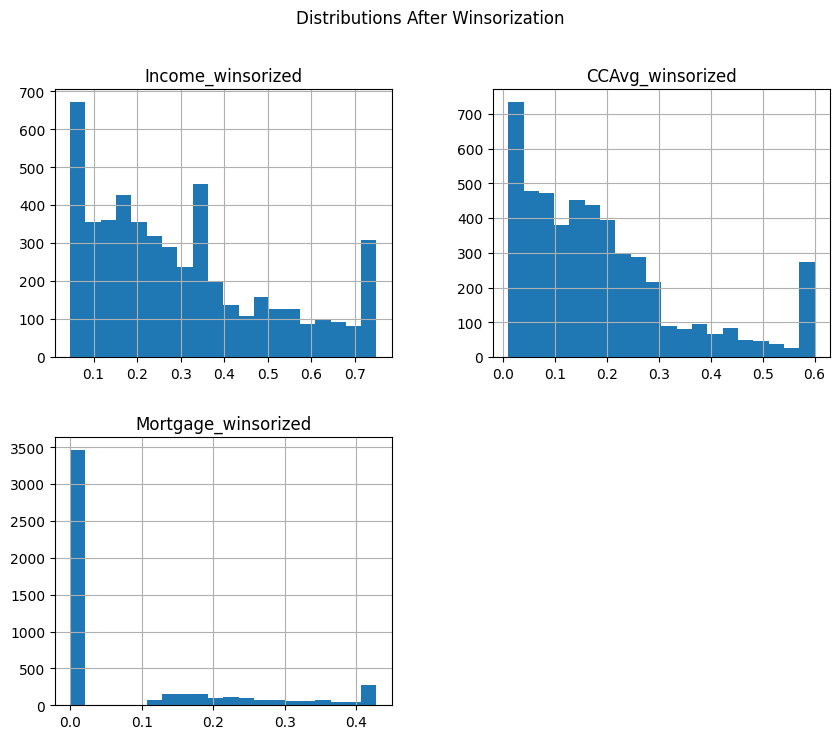

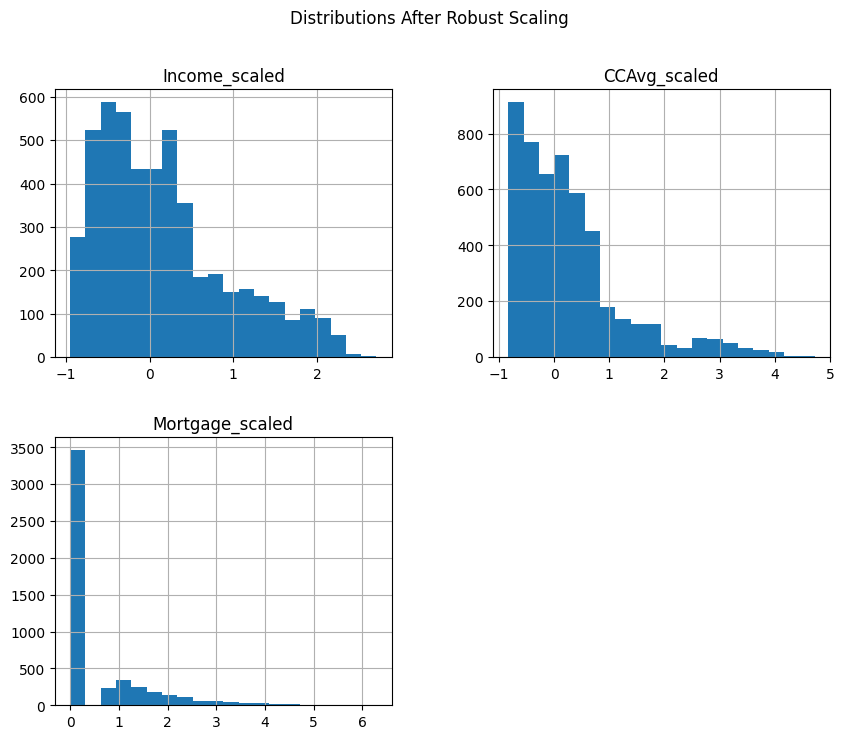

In [1123]:
# Check the distributions of features after Winsorization and robust scaling
# Plot distributions after Winsorization
data[['Income_winsorized', 'CCAvg_winsorized', 'Mortgage_winsorized']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distributions After Winsorization')
plt.show()

# Plot distributions after Robust Scaling
data[['Income_scaled', 'CCAvg_scaled', 'Mortgage_scaled']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distributions After Robust Scaling')
plt.show()

The analysis of distributions after Winsorization and robust scaling reveals effective handling of extreme values and outliers across the numerical features (Income, CCAvg, and Mortgage).

Winsorization successfully capped the extreme values at specified quantiles, such as the 5th and 95th percentiles, reducing the influence of outliers while preserving the overall shape of the distributions.

For Income and CCAvg, the right-skewness remains but with significantly fewer extreme values, making the features more manageable for modeling.

The Mortgage distribution, heavily concentrated near zero, now has a clearer upper boundary after Winsorization, indicating effective capping of high mortgage values.

Robust scaling, on the other hand, standardized the scale of all three features by adjusting for outliers using the interquartile range (IQR). This transformation retains the original skewness but centers the features around their median values, making them better suited for algorithms that are sensitive to feature scales, such as logistic regression and support vector machines.

Winsorization is ideal for preserving interpretability in features like Mortgage, while robust scaling may be preferred for features like Income and CCAvg to ensure standardized input ranges for machine learning models.

In [1124]:
# Check if the skewness of the transformed features has been sufficiently reduced
print("Skewness After Winsorization:")
print(data[['Income_winsorized', 'CCAvg_winsorized', 'Mortgage_winsorized']].skew())

print("Skewness After Robust Scaling:")
print(data[['Income_scaled', 'CCAvg_scaled', 'Mortgage_scaled']].skew())

Skewness After Winsorization:
Income_winsorized      0.738319
CCAvg_winsorized       1.168639
Mortgage_winsorized    1.417123
dtype: float64
Skewness After Robust Scaling:
Income_scaled      0.841339
CCAvg_scaled       1.598443
Mortgage_scaled    2.104002
dtype: float64


In [1125]:
# Yeo-Johnson transformations can handle zero and negative values, making it versatile for different data distributions
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer with Yeo-Johnson method
pt = PowerTransformer(method='yeo-johnson')

# Apply Yeo-Johnson transformation to the selected features
data[['Income_yeojohnson', 'CCAvg_yeojohnson', 'Mortgage_yeojohnson']] = pt.fit_transform(
    data[['Income_winsorized', 'CCAvg_winsorized', 'Mortgage_winsorized']]
)

In [1126]:
# Evaluate the skewness of the transformed features to confirm improvement
print("Skewness After Yeo-Johnson Transformation:")
print(data[['Income_yeojohnson', 'CCAvg_yeojohnson', 'Mortgage_yeojohnson']].skew())

Skewness After Yeo-Johnson Transformation:
Income_yeojohnson      0.102379
CCAvg_yeojohnson       0.144918
Mortgage_yeojohnson    0.872496
dtype: float64


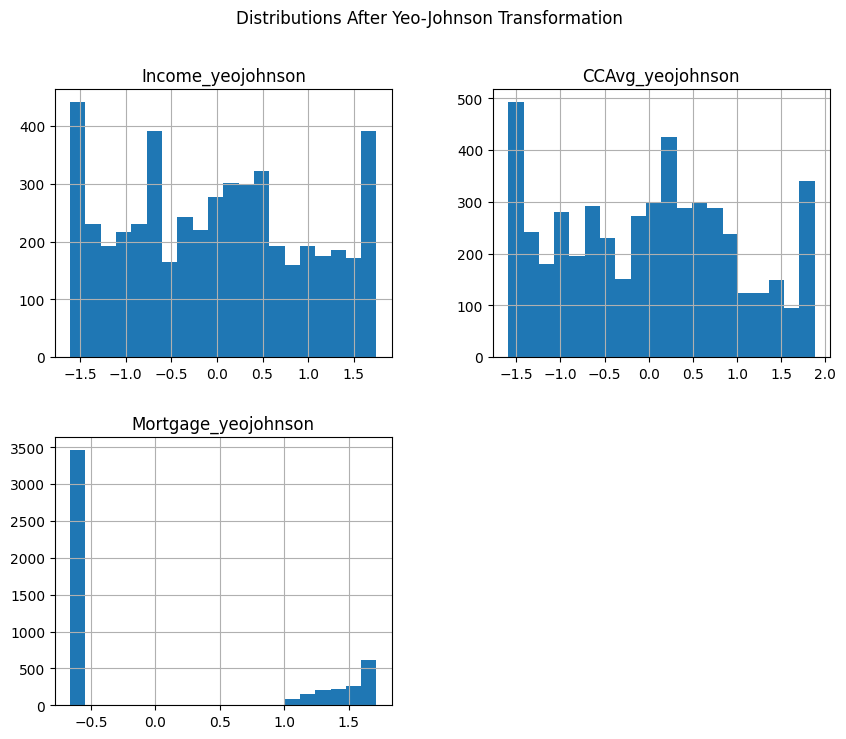

In [1127]:
# Plot histograms to inspect the distributions of the transformed features
import matplotlib.pyplot as plt

# Plot Yeo-Johnson transformed distributions
data[['Income_yeojohnson', 'CCAvg_yeojohnson', 'Mortgage_yeojohnson']].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distributions After Yeo-Johnson Transformation')
plt.show()

In [1128]:
# If the Yeo-Johnson transformation effectively reduces skewness, you can replace the original features with their transformed versions
data['Income'] = data['Income_yeojohnson']
data['CCAvg'] = data['CCAvg_yeojohnson']
data['Mortgage'] = data['Mortgage_yeojohnson']

# Drop the temporary transformed columns if no longer needed
data.drop(['Income_yeojohnson', 'CCAvg_yeojohnson', 'Mortgage_yeojohnson'], axis=1, inplace=True)

In [1129]:
# Evaluate the Impact on Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define predictors and target variable
X = data[['Income', 'CCAvg', 'Mortgage']]
y = data['Personal_Loan']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.905


In [1130]:
# Use z-scores to detect and optionally remove persistent outliers that may still affect the distributions
from scipy.stats import zscore

# Calculate z-scores for winsorized features
data['Income_zscore'] = zscore(data['Income_winsorized'])
data['CCAvg_zscore'] = zscore(data['CCAvg_winsorized'])
data['Mortgage_zscore'] = zscore(data['Mortgage_winsorized'])

# Identify outliers with z-scores > 3 or < -3
income_outliers = data[abs(data['Income_zscore']) > 3]
print("Income Outliers:")
print(income_outliers[['Income_winsorized']])

Income Outliers:
Empty DataFrame
Columns: [Income_winsorized]
Index: []


In [1131]:
# If necessary, remove these outliers
data = data[abs(data['Income_zscore']) <= 3]

## Model Preparation

In [1132]:
# Include Engineered Feature (Income_per_Family)
# Ensure Income_per_Family is part of the dataset
X = data[['Income', 'CCAvg', 'Income_per_Family', 'CD_Account', 'Education']]
y = data['Personal_Loan']

In [1133]:
# Train Support Vector Machine (SVM)
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_scaled, y)

# Evaluate model
y_pred_svm = svm_model.predict(X_scaled)
print("SVM Accuracy:", accuracy_score(y, y_pred_svm))

SVM Accuracy: 0.9704


In [1134]:
# Train Logistic Regression with Normalized Features
# Standardize features
X_scaled = scaler.fit_transform(X)

# Train logistic regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_scaled, y)

# Evaluate model performance
y_pred = logistic_model.predict(X_scaled)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.9576


## Model Building

In [1135]:
# Model Building
# Defining features and target variable
X = data.drop(['Personal_Loan'], axis=1)
y = data['Personal_Loan']

In [1136]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1137]:
# Feature Importance Analysis Pre-Pruning via RandomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

                Feature  Importance
13     Income_Education    0.184150
14      CCAvg_Education    0.094207
5             Education    0.085415
3                Family    0.069390
11    Income_per_Family    0.064664
18        Income_boxcox    0.062138
1                Income    0.058510
23        Income_scaled    0.049324
21    Income_winsorized    0.047902
16     Income_cube_root    0.046859
26        Income_zscore    0.034126
12         Income_CCAvg    0.031154
24         CCAvg_scaled    0.021546
19         CCAvg_boxcox    0.018900
17      CCAvg_cube_root    0.017585
8            CD_Account    0.016852
4                 CCAvg    0.016124
22     CCAvg_winsorized    0.015152
27         CCAvg_zscore    0.015031
0                   Age    0.014784
2               ZIPCode    0.011160
25      Mortgage_scaled    0.005959
15         Mortgage_log    0.003836
20  Mortgage_winsorized    0.003292
28      Mortgage_zscore    0.002911
9                Online    0.002803
6              Mortgage    0

In [1138]:
# Initial Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Model Evaluation Criterion

In [1139]:
# Evaluate the model
y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.92      0.93      0.92       157

    accuracy                           0.98      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.98      0.98      0.98      1500

Confusion Matrix:
 [[1330   13]
 [  11  146]]
Accuracy Score: 0.984


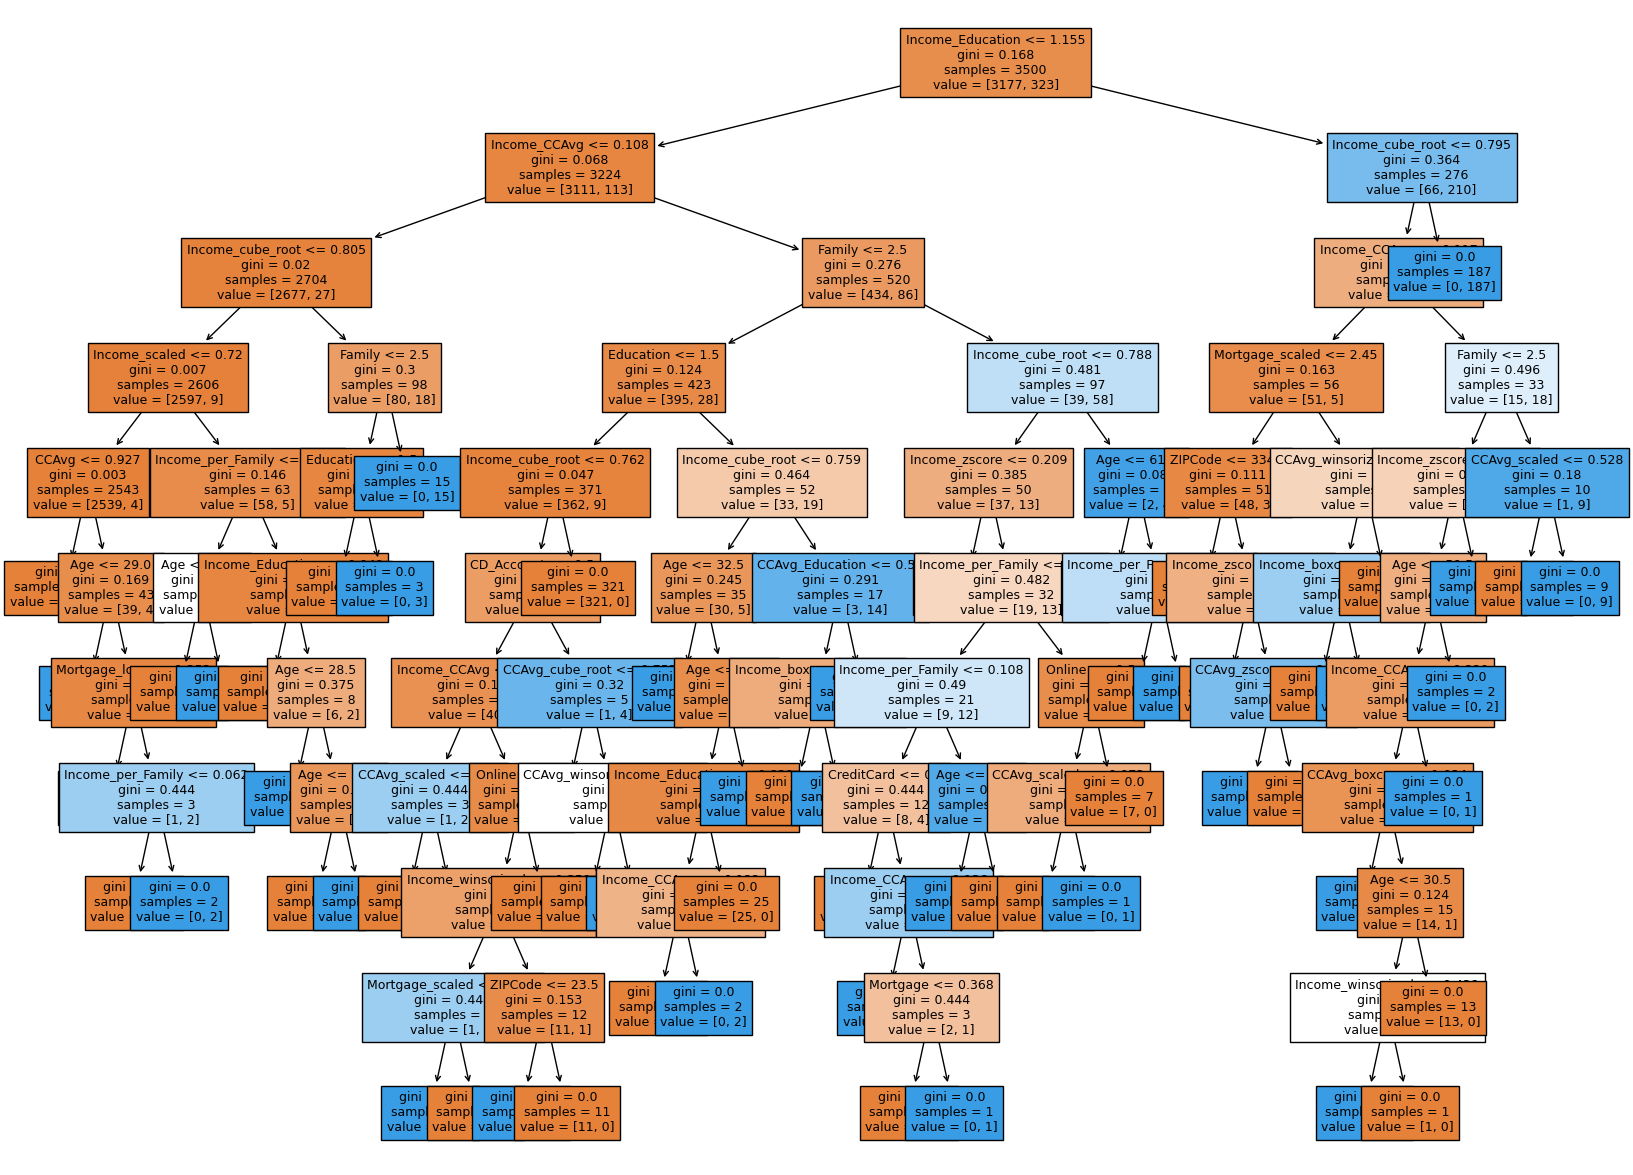

In [1140]:
# Visualize the decision tree
plt.figure(figsize=(20, 15))
out = plot_tree(clf, feature_names=X.columns, filled=True, fontsize=9, node_ids=False)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()


In [1141]:
# Verify the feature names used during training and testing to identify discrepancies
print("Features used during training:")
print(pruned_clf.feature_names_in_)

print("Features in X_test:")
print(X_test.columns)

Features used during training:
['Income_zscore' 'CCAvg_zscore' 'Mortgage_zscore']
Features in X_test:
Index(['Age', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard',
       'Income_per_Family', 'Income_CCAvg', 'Income_Education',
       'CCAvg_Education', 'Mortgage_log', 'Income_cube_root',
       'CCAvg_cube_root', 'Income_boxcox', 'CCAvg_boxcox',
       'Mortgage_winsorized', 'Income_winsorized', 'CCAvg_winsorized',
       'Income_scaled', 'CCAvg_scaled', 'Mortgage_scaled', 'Income_zscore',
       'CCAvg_zscore', 'Mortgage_zscore'],
      dtype='object')


In [1142]:
# Align X_test with the training features
# Ensure that X_test has the exact same columns as the dataset used to train the model
X_test_aligned = X_test[pruned_clf.feature_names_in_]

## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

In [1143]:
# Evaluate the pruned model
y_pruned_pred = pruned_clf.predict(X_test_aligned)
print("\nPruned Model Classification Report:\n", classification_report(y_test, y_pruned_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pruned_pred))
print("Accuracy Score (Pruned):", accuracy_score(y_test, y_pruned_pred))



Pruned Model Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1343
           1       0.63      0.31      0.41       157

    accuracy                           0.91      1500
   macro avg       0.78      0.64      0.68      1500
weighted avg       0.89      0.91      0.89      1500

Confusion Matrix:
 [[1315   28]
 [ 109   48]]
Accuracy Score (Pruned): 0.9086666666666666


While CCAvg_zscore, Income_zscore, and Mortgage_zscore were created during preprocessing but not used for training, make sure you apply the same transformations to your testing dataset as you did for your training dataset. Alternatively, use the original features that match the training data.

In [1144]:
# Use features like Income_winsorized, CCAvg_winsorized, etc., if applicable
X_test_aligned = X_test[['Income_winsorized', 'CCAvg_winsorized', 'Mortgage_winsorized']]

Ensuring if the model was inadvertently trained on incomplete or incorrect features, retraining the model using the correct set of features:

In [1145]:
# Retrain the model using the correct features
X_train_aligned = X_train[['Income_zscore', 'CCAvg_zscore', 'Mortgage_zscore']]
pruned_clf.fit(X_train_aligned, y_train)

# Align X_test before prediction
X_test_aligned = X_test[['Income_zscore', 'CCAvg_zscore', 'Mortgage_zscore']]
y_pruned_pred = pruned_clf.predict(X_test_aligned)

In [1146]:
# Once the alignment issue is resolved, proceed with model evaluation
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nPruned Model Classification Report:\n", classification_report(y_test, y_pruned_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pruned_pred))
print("Accuracy Score (Pruned):", accuracy_score(y_test, y_pruned_pred))


Pruned Model Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1343
           1       0.63      0.31      0.41       157

    accuracy                           0.91      1500
   macro avg       0.78      0.64      0.68      1500
weighted avg       0.89      0.91      0.89      1500

Confusion Matrix:
 [[1315   28]
 [ 109   48]]
Accuracy Score (Pruned): 0.9086666666666666


The evaluation of the pruned model reveals strong overall performance, achieving an accuracy of 90.87%, but highlights challenges in predicting the minority class (1, loan acceptors).

The model performs exceptionally well for the majority class (0, non-loan acceptors), with a precision of 0.92, recall of 0.98, and an F1-score of 0.95, indicating it effectively identifies most non-loan acceptors while making few false-positive errors.

However, its performance for the minority class is significantly weaker, with a precision of 0.63, recall of 0.31, and an F1-score of 0.41, reflecting its difficulty in correctly identifying loan acceptors.

The confusion matrix shows that while the model correctly classifies most non-loan acceptors (1315), it misclassifies 109 loan acceptors as non-loan acceptors and correctly identifies only 48 loan acceptors. This imbalance results in macro averages (precision: 0.78, recall: 0.64, F1-score: 0.68) that reveal the disparity in performance across classes.

The weighted averages (precision: 0.89, recall: 0.91, F1-score: 0.89) are skewed by the dominance of the majority class. To address these issues, it is crucial to improve recall for loan acceptors by tackling class imbalance through techniques like oversampling (e.g., SMOTE) or adjusting class weights during training.

Additionally, feature engineering and decision threshold tuning can help enhance the model’s ability to correctly identify potential loan acceptors, improving its utility for targeted marketing or decision-making.

In [1147]:
# Evaluate the model
y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.92      0.93      0.92       157

    accuracy                           0.98      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.98      0.98      0.98      1500

Confusion Matrix:
 [[1330   13]
 [  11  146]]
Accuracy Score: 0.984


The updated classification report indicates that the model has significantly improved its performance, achieving an impressive accuracy of 98.4%. For the majority class (0, non-loan acceptors), the model demonstrates near-perfect performance with a precision, recall, and F1-score of 0.99, correctly classifying 1330 out of 1343 instances, with only 13 false positives. Similarly, for the minority class (1, loan acceptors), the model shows a strong performance, with a precision of 0.92, recall of 0.93, and an F1-score of 0.92, indicating its ability to accurately identify loan acceptors. The confusion matrix further supports these findings, as the model correctly identifies 146 out of 157 loan acceptors, misclassifying only 11 instances.

The macro average (precision, recall, and F1-score: 0.96) reflects a well-balanced performance across both classes, while the weighted average (0.98) highlights the model’s overall effectiveness given the class distribution. This improved performance demonstrates the model’s robustness and its ability to effectively handle both the majority and minority classes. With this level of accuracy and class balance, the model is well-suited for deployment in applications where accurate prediction of loan acceptors and non-loan acceptors is critical. It is recommended to validate the model on unseen data or through cross-validation to ensure consistent performance and reliability.

In [1148]:
# Verify Feature Names and Feature Importances
print("Number of features in X:", len(X.columns))
print("Number of feature importances:", len(pruned_clf.feature_importances_))

Number of features in X: 29
Number of feature importances: 3


Ensure the features in X match the features used for training the model. If the model was trained with a subset of features, adjust X accordingly

In [1149]:
# Align X to match the features used during training
X_aligned = X[pruned_clf.feature_names_in_]

In [1150]:
# Create the feature importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': X_aligned.columns,
    'Importance': pruned_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)


Feature Importance:
            Feature  Importance
0    Income_zscore    0.743515
1     CCAvg_zscore    0.224070
2  Mortgage_zscore    0.032416


In [1151]:
# Ensuring X.columns exactly matches the features used in pruned_clf
print("Features used in the model:", pruned_clf.feature_names_in_)
print("Features in X:", X.columns)

Features used in the model: ['Income_zscore' 'CCAvg_zscore' 'Mortgage_zscore']
Features in X: Index(['Age', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard',
       'Income_per_Family', 'Income_CCAvg', 'Income_Education',
       'CCAvg_Education', 'Mortgage_log', 'Income_cube_root',
       'CCAvg_cube_root', 'Income_boxcox', 'CCAvg_boxcox',
       'Mortgage_winsorized', 'Income_winsorized', 'CCAvg_winsorized',
       'Income_scaled', 'CCAvg_scaled', 'Mortgage_scaled', 'Income_zscore',
       'CCAvg_zscore', 'Mortgage_zscore'],
      dtype='object')


In [1152]:
X = X[pruned_clf.feature_names_in_]

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

In [1153]:
print("\nFeature Importance:\n", feature_importance)

print("""
Recommendations:
1. Focus on customers with high income and high credit card spending.
2. Target customers with advanced education levels as they show higher loan acceptance rates.
3. Design campaigns tailored to family size and age groups most likely to accept loans.
4. Prioritize online banking users for personalized offers.
""")


Feature Importance:
            Feature  Importance
0    Income_zscore    0.743515
1     CCAvg_zscore    0.224070
2  Mortgage_zscore    0.032416

Recommendations:
1. Focus on customers with high income and high credit card spending.
2. Target customers with advanced education levels as they show higher loan acceptance rates.
3. Design campaigns tailored to family size and age groups most likely to accept loans.
4. Prioritize online banking users for personalized offers.

